## Perspective PS4

### Multiple Linear Regression 

#### a. Import data

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [20]:
auto = pd.read_csv('Auto.csv', na_values = '?')
auto.dropna(inplace = True)
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


#### b. produce a scatterplot

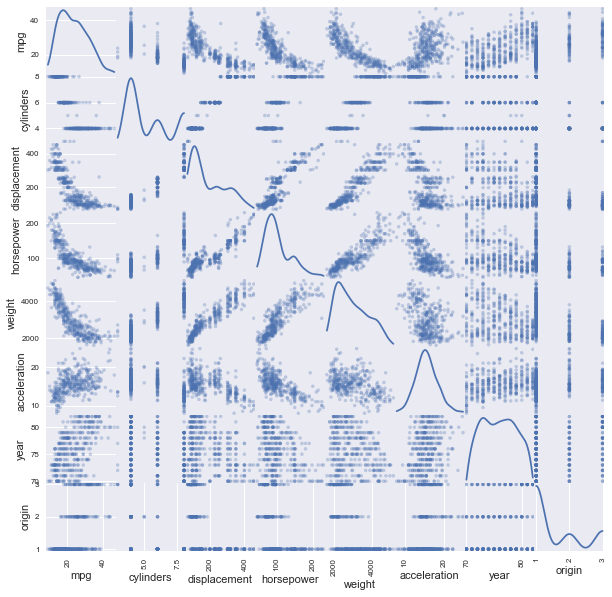

In [21]:
from pandas.plotting import scatter_matrix
%matplotlib inline
df_quant = auto[['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']]
plt = scatter_matrix(df_quant,alpha = 0.3, figsize = (10,10), diagonal = 'kde')

#### c. compute correlation matrix

In [22]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### d. estimate linear regression model

In [23]:
import statsmodels.api as sm
X = sm.add_constant(df_quant.iloc[:,1:])
reg = sm.OLS(endog=auto['mpg'], exog= X, missing='drop').fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        16:53:45   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

The regression is:

mpg = -17.2184 - 0.4934 cylinders + 0.0199 displacement - 0.0170 horsepower - 0.0065 weight + 0.0806 acceleration + 0.7508 year + 1.4261 origin


From the table above we can see that: 
i).  Besides the constant, displacement, weight, year and origin are statistically significant at 1% level.
ii). Cylinders, horsepower and acceleration are not significant at 10% level. 
iii). The coefficient of year is 0.7508, which indicates that the miles per gallon(mpg) is increased by 0.7508 unit per year.  

#### e). non-linear relationship  

By looking at the scatter plot at the first row in the scatter matrix plot, we can find out that variables displacement, horsepower and weight are most likely to have non-linear relationship with mpg.

#### i). estimate nonlinear relationship 

In [24]:
sqrt = pd.concat([auto['displacement']**2, auto['horsepower']**2 , auto['weight']**2, auto['acceleration']**2],axis =1)

sqrt.rename(columns={'displacement': 'displacement_sqr', 'horsepower': 'horsepower_sqr', 'weight': 'weight_sqr',
                    'acceleration': 'acceleration_sqr'}, inplace=True)
X_sqr = pd.concat([X, sqrt], axis =1)
reg_new = sm.OLS(endog=auto['mpg'], exog= X_sqr, missing='drop').fit()
print(reg_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        16:53:50   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               20.1084      6.696  

The new regression model is:

mpg = 20.1084 + 0.2519 cylinders -0.0169 displacement - 0.1635 horsepower - 0.0136 weight - 2.0884 acceleration + 0.7810 year + 0.6104 origin - $2.257*10^{-5}$ displacement_sqr - 0.0004 horsepower_sqr - $1.514 *10^{-6}$ weight_sqr - 0.0576 accleration_sqr

#### iii). adjusted R-squared

In [25]:
print('adjusted R-squared:', 0.866)

adjusted R-squared: 0.866


The adjusted R-squared in part d is 0.818. Hence the model with the inclusion of these squared terms have bigger adjusted R-squared, which suggests the model fits better.

#### iv). coefficient on displacement 

The coefficient on displacement in the regression model in part d is 0.199 and significant at 1% level, however, the coefficient becomes -0.0169 and insignificant (p-vaule = 0.408) after the inclusion of the squared term. The coefficient of the squared term is $2.257*10^{-5}$ with a p-value 0.532, which is insignificant. 

#### v). coefficient on cylinders 

The cylinders variable has a p-value equals to 0.128 in the regression from part d), and it becomes much more insignificant in the new regression model (p-value = 0.440). At the same time, the coefficient becomes positive.

#### f). Prediction 

In [26]:
x = np.array([1, 6, 200, 100, 3100, 15.1, 99, 1, 200**2, 100**2, 3100**2, 15.1**2])
reg_new.predict(x)

array([ 38.7321111])

### 2. KNN Classfication

In [27]:
import pandas as pd
df = pd.DataFrame({'X1':[0,2,0,0,-1,1], 'X2': [3,0,1,1,0,1], 'X3':[0,0,3,2,1,1], 
                   'Y':['Red', 'Red', 'Red', 'Green', 'Green', 'Red']})
df

,X1,X2,X3,Y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


#### a). Compute Euclidean Distance

In [28]:
def Compute_distance(p_vals, q_vals):
    distance = ((p_vals - q_vals)**2).sum()
    return np.sqrt(distance)

dis_lst = []
for i in range(df.shape[0]):
    distance = Compute_distance(df.iloc[i, 0:3], np.array([0,0,0]))
    dis_lst.append(distance) 
    
print('Euclidean Distance between each observation and the test point:')  
print(dis_lst)

Euclidean Distance between each observation and the test point:
[3.0, 2.0, 3.1622776601683795, 2.2360679774997898, 1.4142135623730951, 1.7320508075688772]


#### b). K=1

The KNN prediction for K=1 should be Green for the point $X_1=X_2=X3=0$. The nearest point is the fifth observation. Given the formula 
$$P(y=j\,|\, X=x ) = \frac{1}{K}\sum_{i \in \mathcal{A}} I(y^{(i)}= j) $$
The set $\mathcal{A}$ contains only the nearest point, so the probability that the test point has the same classification as the nearest point is 100%. Hence, the we predict "Green". 

#### c). K=3

The nearest three points are the fifth, the sixth and the second observation, and their categories are "Green", "Red", "Red", correspondingly. According to the formula in part b), we can calcualte the probability that the test point is "Red" as follows: 
$$P(y = "Red"\,|\, X_1=X_2=X_3 = 0) = \frac{1}{3} \sum_{i \in \mathcal{A}} I(y^{(i)} = "Red") = \frac{2}{3}$$

Accordingly, the probability that the test point is "Green" is:
$$P(y = "Green"\,|\, X_1=X_2=X_3 = 0) = \frac{1}{3} \sum_{i \in \mathcal{A}} I(y^{(i)} = "Green") = \frac{1}{3}$$

Hence, we can predict the test point as "Red".

#### d). Non-linear Bayes decision boundary 

I expect the optimal K should be larger than the current one. A higher K averages more voters in each prediction and hence is more resilient to outliers. Larger values of K will have smoother decision boundaries which means lower variance but increased bias. 

#### e). KNN estimation 

In [29]:
from sklearn.neighbors import KNeighborsClassifier
X = np.array(df.iloc[:, 0:3])
y = np.array(df.iloc[:,3])
neighbor = KNeighborsClassifier(n_neighbors=2)
neighbor.fit(X, y)
X_test = [[1,1,1]]
neighbor.predict(X_test)[0]

'Green'

#### 3. Multivariate Logit Regression

In [30]:
auto = pd.read_csv('Auto.csv', na_values = '?')
auto.dropna(inplace = True)
mpg_high = []
for i in auto['mpg']:
    if i > auto['mpg'].median():
        mpg_high.append(1)
    else:
        mpg_high.append(0)
        
auto['mpg_high'] = mpg_high
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl,0


#### a). estimate the logit regression 

In [31]:
X = sm.add_constant(auto.iloc[:,1:-2])
y = auto.iloc[:,-1]
LogitModel = sm.Logit(y,X)
LogitReg_sm = LogitModel.fit()
LogitReg_sm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        16:54:07   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [32]:
print("Regressors that are significant at 5% level: weight, year")

Regressors that are significant at 5% level: weight, year


#### b). split the data

In [33]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)

#### c). estimate logit regression 

In [34]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, y_train)
print("Intercept:", logit.intercept_)
print("Coefficient:", logit.coef_[0][1:])

Intercept: [-0.0692869]
Coefficient: [-0.66356138  0.00573408 -0.03868635 -0.0049991  -0.14223172  0.30003565
 -0.15092121]


In [35]:
yhat = logit.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, yhat)
confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



From above table we can see that the prediction precision is a bit higher for low_mpg than for high_mpg.